## Popularity Analysis

This analysis aims to identify and quantify any popularity bias in the recommendations. Businesses are categorized into popular and long-tail items based on a percentile cutoff following the Pareto Principle.


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df_ranked_results = pd.read_csv('../Models_Deep_FM/all_ranked_results.csv')

In [ ]:
# group by user_id and get the top 100 items for each user
df_ranked_results = df_ranked_results.groupby('user_id').head(100)
# df_ranked_results = df_ranked_results.groupby('user_id').head(500)

In [3]:
df_ranked_results

,business_id,score,user_id,real_label
0,ytynqOUb3hjKeJfRj5Tshw,5.222930,--4AjktZiHowEIBCMd4CZA,0
1,-fs09akgCKv5rTTy7iUHUg,5.119537,--4AjktZiHowEIBCMd4CZA,0
2,TE2IEDNV0RcI6s1wTOP4fg,5.111618,--4AjktZiHowEIBCMd4CZA,0
3,KTGEa8V9ec0QBYM_uk1YLQ,5.106303,--4AjktZiHowEIBCMd4CZA,0
4,ctHjyadbDQAtUFfkcAFEHw,5.100107,--4AjktZiHowEIBCMd4CZA,0
...,...,...,...,...
554952,VJ2BIGD9Q-vyE960n-4-dA,4.301839,08wIbJCYDZoYdbkDAMAb3w,0
554953,kvb0a9FiFs9UXWxE6q-5DA,4.301810,08wIbJCYDZoYdbkDAMAb3w,0
554954,DXNKGOCVmFP5iU8owhK2Fw,4.301074,08wIbJCYDZoYdbkDAMAb3w,0
554955,aROWvF8ltWk6LLNO62haag,4.300865,08wIbJCYDZoYdbkDAMAb3w,0


In [16]:
df_ranked_results['user_id'].unique()

array(['--4AjktZiHowEIBCMd4CZA', '--KsuCSkGGvDKTbdK9NvIg',
       '--Vu3Gux9nPnLcG9yO_HxA', '--XwFm4qERD6J5SX0JAsbg',
       '--_H9j6ggxvqhh9nPofZwg', '--_r6E98SNIrGU7weyNxbw',
       '--u09WAjW741FdfkJXxNmg', '-02tzlpQosZ9HE85jEtV6Q',
       '-05wJ5BVkv8lYBIC_H5F-Q', '-0H6Rm6dCi3pkFBC26HsoQ',
       '-0KrCHEsOcjJ6N4k_k1A9A', '-0rW5xrSCH1HCnSEmoQA5A',
       '-1-pTXLHph2vcqRCNeT4_Q', '-13RX4Gy_F-zoLIenWAo-w',
       '-16bjdAbpdPLuGrfGPSPNQ', '-1MF2tosrw2WcCxeVNk81Q',
       '-1MiSauypbVtNnWts4aXpA', '-1WbN1Qd-opw8u3uEqs2Kg',
       '-2cKJFFNJ9XVyWBt62mWvA', '-2nNiAnDaSbQayynsqgL6Q',
       '-2zeaby7CmyAb6AIjX0cmw', '-3HYmxW_5Gsg4I0eH3ju-Q',
       '-3agoL-p87vZteiDzrz5og', '-3m3CcApRSL_k2XSluzuMg',
       '-3s52C4zL_DHRK0ULG6qtg', '-43uAiZZ6wsGhaurBi3Cdw',
       '-4D4Q_Fxj_rEL32t0VtzFQ', '-4RMTrzXEjs0ttG7stsl2Q',
       '-4adygW78x5K_xSG0u3Y6Q', '-4mjLXqAoAtQjqDFo9q9WQ',
       '-4r6OoklyemH7Up70wIhMA', '-50lprJ4kZ-XCM1hPU2vqg',
       '-584avr5GMIqv-9Ut85Ywg', '-5Slg5hO3useiypXYgZkGg

### import df_review & define popular and long tail businesses

In [3]:
import sys
sys.path.append('../')
from utilities import *

In [4]:
# Define the database folder path and file names
db_folder = '../../data/processed_data/yelp_data/'
data_files = ['business', 'categories', 'review', 'user']

# Load data into a dictionary
yelp_data = load_data_from_db(db_folder, data_files)

# Check loaded data
for table, df in yelp_data.items():
    print(f"Loaded {len(df)} rows from {table} table.")

Loaded 78059 rows from business table.
Loaded 360656 rows from categories table.
Loaded 980418 rows from review table.
Loaded 229447 rows from user table.


In [5]:
df_business = yelp_data["business"]
df_business = df_business[['business_id', 'review_count']].dropna()

In [6]:
total_reviews = df_business['review_count'].sum()
# Sort review counts descending
review_counts_sorted = df_business.sort_values("review_count", ascending=False).reset_index(drop=True)
review_counts_sorted['cum_reviews'] = review_counts_sorted['review_count'].cumsum()
review_counts_sorted['cum_percent'] = review_counts_sorted['cum_reviews'] / total_reviews

In [10]:
review_counts_sorted

,business_id,review_count,cum_reviews,cum_percent
0,_ab50qdWOk0DdB6XOrBitw,7568,7568,0.001305
1,ac1AeYqs8Z4_e2X5M3if2A,7400,14968,0.002580
2,GXFMD0Z4jEVZBCsbPf4CTQ,6093,21061,0.003631
3,ytynqOUb3hjKeJfRj5Tshw,5721,26782,0.004617
4,oBNrLz4EDhiscSlbOl8uAw,5193,31975,0.005512
...,...,...,...,...
78054,EGnlAVXdGpUQWl0AlG5L-A,5,5800850,0.999997
78055,JGJqPMFUyE_H2j8zOypR8g,5,5800855,0.999997
78056,g3CBrw-O3JSwLedn8SaXPg,5,5800860,0.999998
78057,3LD2JUarSKmBo3ovENj9gQ,5,5800865,0.999999


In [42]:
# Find the index where cumulative review % exceeds 80%
cutoff_index = review_counts_sorted[review_counts_sorted['cum_percent'] >= 0.6].index[0]
review_cutoff_value = review_counts_sorted.loc[cutoff_index, 'review_count']

# Define popular and long-tail items
popular_items = set(review_counts_sorted.loc[:cutoff_index, 'business_id'])
long_tail_items = set(review_counts_sorted.loc[cutoff_index+1:, 'business_id'])

print(f"Cutoff Review Count: {review_cutoff_value}")
print(f"# Popular Items: {len(popular_items)} | # Long-Tail Items: {len(long_tail_items)}")

Cutoff Review Count: 127
# Popular Items: 11174 | # Long-Tail Items: 66885


### ranking evaluation

In [21]:
df_ranked_results = df_ranked_results.sort_values(by=["user_id", "score"], ascending=[True, False]) 
grouped = df_ranked_results.groupby("user_id")
relevance_per_user = grouped["real_label"].apply(list).to_dict()

In [64]:
def mean_reciprocal_rank(relevance_dict):
    rr_list = []
    for rels in relevance_dict.values():
        try:
            rank = rels.index(1) + 1  # 1-based rank
            rr_list.append(1 / rank)
        except ValueError:
            rr_list.append(0)
    return np.mean(rr_list)


In [65]:
def first_relevant_rank(relevance_dict):
    ranks = []
    for rels in relevance_dict.values():
        try:
            rank = rels.index(1) + 1
        except ValueError:
            rank = None
        ranks.append(rank)
    return ranks  # return raw list for analysis


In [66]:
def dcg(rels, k=None):
    if k:
        rels = rels[:k]
    return sum((2**rel - 1) / np.log2(i + 2) for i, rel in enumerate(rels))

def ndcg_at_k(relevance_dict, k=10):
    scores = []
    for rels in relevance_dict.values():
        dcg_val = dcg(rels, k)
        ideal_rels = sorted(rels, reverse=True)
        idcg_val = dcg(ideal_rels, k)
        scores.append(dcg_val / idcg_val if idcg_val > 0 else 0)
    return np.mean(scores)

def ndcg_all(relevance_dict):
    return ndcg_at_k(relevance_dict, k=None)


In [67]:
def recall_at_k(relevance_dict, k=10):
    recalls = []
    for rels in relevance_dict.values():
        relevant_total = sum(rels)
        if relevant_total == 0:
            recalls.append(0)
            continue
        recalls.append(sum(rels[:k]) / relevant_total)
    return np.mean(recalls)


In [68]:
def average_precision(rels):
    score = 0
    hit_count = 0
    for i, rel in enumerate(rels):
        if rel == 1:
            hit_count += 1
            score += hit_count / (i + 1)
    return score / hit_count if hit_count > 0 else 0

def mean_average_precision(relevance_dict):
    return np.mean([average_precision(rels) for rels in relevance_dict.values()])


In [69]:
mrr = mean_reciprocal_rank(relevance_per_user)
first_ranks = first_relevant_rank(relevance_per_user)
ndcg_10 = ndcg_at_k(relevance_per_user, k=10)
ndcg_all_val = ndcg_all(relevance_per_user)
recall_10 = recall_at_k(relevance_per_user, k=10)
map_score = mean_average_precision(relevance_per_user)

print(f"MRR: {mrr:.4f}")
print(f"Mean First Relevant Rank: {np.mean([r for r in first_ranks if r is not None]):.2f}")
print(f"NDCG@10: {ndcg_10:.4f}")
print(f"NDCG_all: {ndcg_all_val:.4f}")
print(f"Recall@10: {recall_10:.4f}")
print(f"MAP: {map_score:.4f}")


MRR: 0.0004
Mean First Relevant Rank: 43.60
NDCG@10: 0.0000
NDCG_all: 0.0020
Recall@10: 0.0000
MAP: 0.0004


### popularity analysis

In [8]:
def compute_long_tail_metrics(recommendations_df, popular_items, long_tail_items):
    # Total number of unique businesses recommended
    unique_recommended_businesses = set(recommendations_df['business_id'])
    
    # Long-Tail Coverage: proportion of unique recommended businesses that are long-tail
    long_tail_recommended = unique_recommended_businesses.intersection(long_tail_items)
    long_tail_coverage = len(long_tail_recommended) / len(unique_recommended_businesses) if unique_recommended_businesses else 0

    # Popularity Bias: total # of recs that belong to popular items
    popular_recs = recommendations_df['business_id'].isin(popular_items).sum()
    total_recs = len(recommendations_df)
    popularity_bias = popular_recs / total_recs if total_recs else 0

    # Gini Coefficient (unchanged)
    rec_counts = recommendations_df['business_id'].value_counts()
    n = len(rec_counts)
    if n == 0:
        gini = 0
    else:
        sorted_counts = rec_counts.sort_values().values
        cum = np.cumsum(sorted_counts)
        gini = 1 - 2 * np.sum((cum - sorted_counts / 2) / cum[-1]) / n

    # change to float
    long_tail_coverage = float(long_tail_coverage)
    gini = float(gini)
    popularity_bias = float(popularity_bias)
    return long_tail_coverage, gini, popularity_bias

In [9]:
# Compute metrics
long_tail_coverage, gini, popularity_bias = compute_long_tail_metrics(df_ranked_results, popular_items, long_tail_items)
print(f"Long-Tail Coverage: {long_tail_coverage:.5f}")
print(f"Gini Coefficient: {gini:.5f}")
print(f"Popularity Bias: {popularity_bias:.5f}")


Long-Tail Coverage: 0.30556
Gini Coefficient: 0.76384
Popularity Bias: 0.85908


In [25]:
df_ranked_results['business_id'].nunique()

858

In [47]:
df_ranked_results = df_ranked_results.groupby('user_id').head(100)


In [48]:
long_tail_coverage, gini, popularity_bias = compute_long_tail_metrics(df_ranked_results, popular_items, long_tail_items)
print(f"Long-Tail Coverage: {long_tail_coverage:.5f}")
print(f"Gini Coefficient: {gini:.5f}")
print(f"Popularity Bias: {popularity_bias:.5f}")

Long-Tail Coverage: 0.35315
Gini Coefficient: 0.78391
Popularity Bias: 0.78205


### visualization

(np.float64(-1.1282060501498594),
 np.float64(1.1013430570323928),
 np.float64(-1.1006672740371748),
 np.float64(1.1140225122936296))

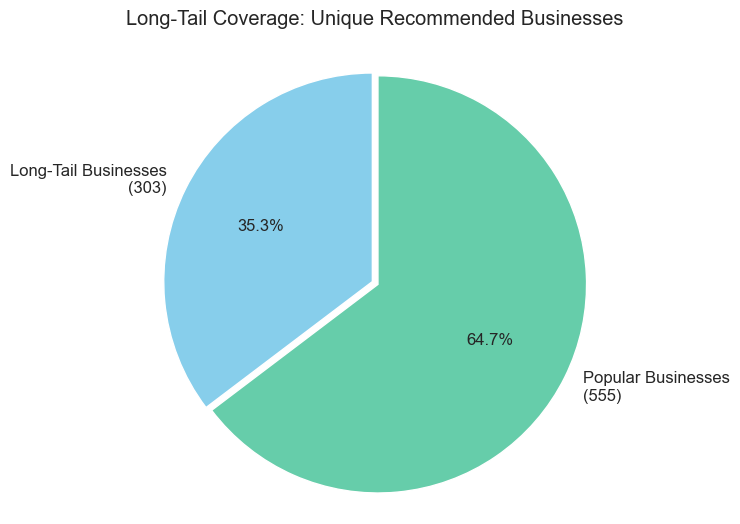

In [49]:
# Set Seaborn style and context for improved aesthetics
sns.set_style("white")
sns.set_context("notebook", font_scale=1.2)

# Long-Tail Coverage Pie Chart
unique_recommended_businesses = set(df_ranked_results['business_id'])
long_tail_recommended = unique_recommended_businesses.intersection(long_tail_items)
popular_recommended = unique_recommended_businesses.intersection(popular_items)
long_tail_count = len(long_tail_recommended)
popular_count = len(popular_recommended)

plt.figure(figsize=(8, 6))
labels = [f'Long-Tail Businesses\n({long_tail_count})', f'Popular Businesses\n({popular_count})']
sizes = [long_tail_count, popular_count]
# colors = sns.color_palette("pastel")[4:6]  # Use Seaborn's pastel palette
colors = ['skyblue', 'mediumaquamarine']

explode = (0.03, 0)  # Slightly separate the first wedge

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, 
        textprops={'fontsize': 12}, shadow=False, explode=explode)
plt.title('Long-Tail Coverage: Unique Recommended Businesses', pad=20)
plt.axis('equal')

(np.float64(-1.0999998888480194),
 np.float64(1.0999999716661912),
 np.float64(-1.101161832777397),
 np.float64(1.1243999333833206))

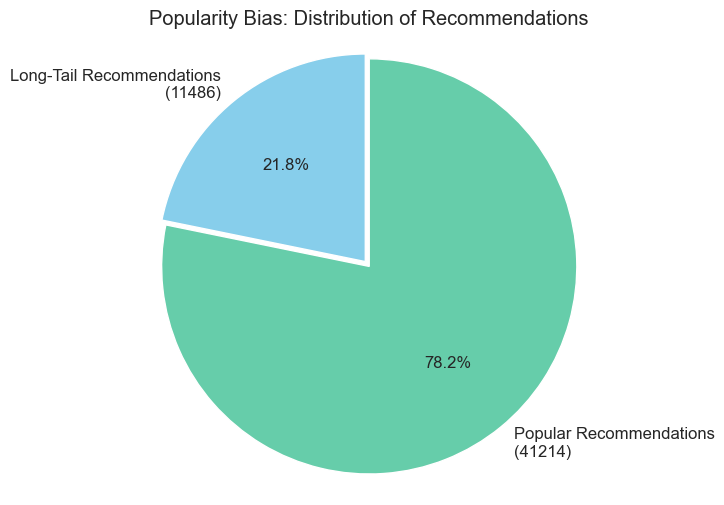

In [50]:
# Popularity Bias Pie Chart
popular_recs = df_ranked_results['business_id'].isin(popular_items).sum()
long_tail_recs = len(df_ranked_results) - popular_recs

plt.figure(figsize=(8, 6))
# label with counts
labels = [f'Long-Tail Recommendations\n({long_tail_recs})', f'Popular Recommendations\n({popular_recs})']
sizes = [long_tail_recs, popular_recs]
colors = ['skyblue', 'mediumaquamarine']
explode = (0.03, 0.0)  # Slightly separate the first wedge
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12}, explode=explode)
plt.title('Popularity Bias: Distribution of Recommendations')
plt.axis('equal')

(0.0, 0.010512883962166706)

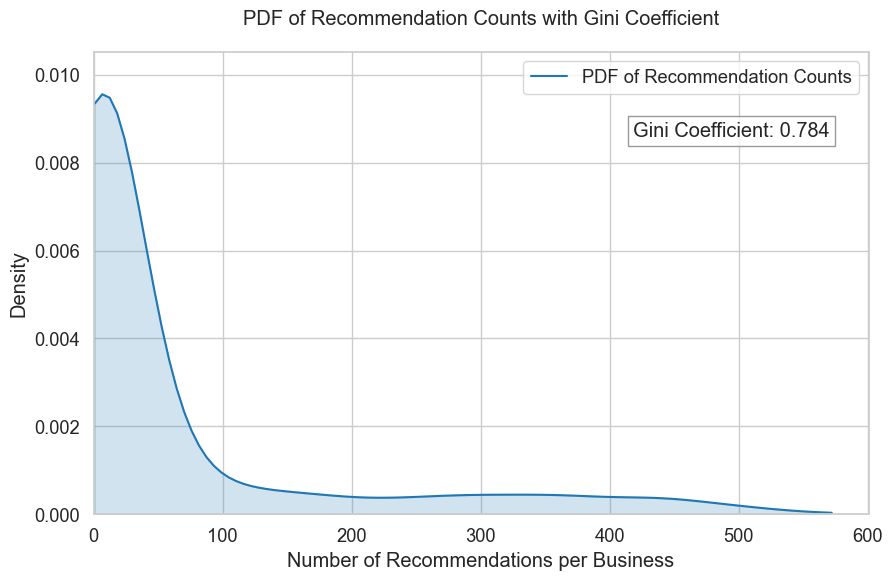

In [51]:
from scipy.stats import gaussian_kde

# Set Seaborn style and context for improved aesthetics
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Gini Coefficient PDF Plot
rec_counts = df_ranked_results['business_id'].value_counts().values
kde = gaussian_kde(rec_counts)
x = np.linspace(min(rec_counts), max(rec_counts), 100)
y = kde(x)

plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=y, color='#1f77b4', label='PDF of Recommendation Counts')
plt.fill_between(x, y, alpha=0.2, color='#1f77b4')
plt.title('PDF of Recommendation Counts with Gini Coefficient', pad=20)
plt.xlabel('Number of Recommendations per Business')
plt.ylabel('Density')
plt.text(0.95, 0.85, f'Gini Coefficient: {gini:.3f}', transform=plt.gca().transAxes, 
         ha='right', va='top', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
plt.xlim(left=0)
plt.ylim(bottom=0, top=max(y)*1.1)
# plt.legend(loc='upper right')